### Classification on Imbalanced Data using Sampling Techniques : Credit Card Fraud Detection

This project is based on the Credit Card Fraud detection from Kaggle[https://www.kaggle.com/mlg-ulb/creditcardfraud]. The main objective of this project is to assess how imbalanced data leads to overfitting and how we can resolve the issue using undersampling and oversampling techniques.

### Dataset 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Source:https://www.kaggle.com/mlg-ulb/creditcardfraud

#### I have used the following models for comparison:

    - Logistic Regression Classifier
    - Suppot Vector Classifer
    - K Neighbors Classifier
    - Decision Tree Classifier
    - XGBoost Classifier
    - Artificial Neural Network

##### Steps involved are as follows:
    
   1. Importing all the required libraries
   2. Creating helper functions: simple_fit_predict, best_estimator, precision-recall_curve, roc_curve. 
      (For ease of following, I have kept all the helper functions in the same notebook compared to moving them into separate .py files)
   3. Loading the dataset and performing data exploration
   4. Data preprocessing on continuous as well as categorical fields
   5. Splitting into training/testing set
   6. Applying simple_fit_predict to see how imbalanced data performs
   7. Apply subsampling techniques
   8. Hyper parameter tuning on the subsampled data to find optimized estimators
   9. Evaluating results using Precision-Recall and ROC curves
   10. Print Classification report
   11. Apply Oversampling using SMOTE technique
   12. Repeat steps 9-10 for Oversampling
   13. Perform the similar analysis using Subsampling and Oversampling on Aritificial Neural Network (ANN)
   14. Analyzing Overall Results

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, cross_validate, ShuffleSplit, RandomizedSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer, fbeta_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

from funcsigs import signature
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset
dataset = pd.read_csv('D:\Manju - CS\Credit_Card_Fraud\creditcard.csv\creditcard.csv')

### Data Exploration


In [3]:
print(dataset.head()) # All columns

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Displaying the range of values in all columns
print(dataset.describe()) 

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

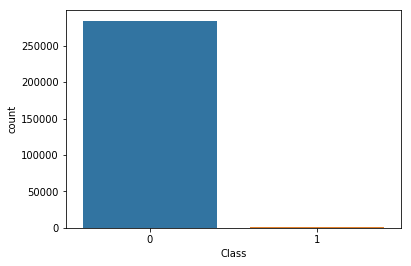

In [5]:
# Finding the Class distribution
sns.countplot("Class", data = dataset )
plt.show()

The dataset looks like its highly imbalanced. The entries for fraud transactions (Class 1) is minimal compared to authentic transactions (Class 0).

In [6]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('Percentage of fraud transactions is ', round(dataset[dataset.Class ==1].count()[0]/len(dataset)*100,2), '%')

Percentage of fraud transactions is  0.17 %


##### Since the dataset is highly imbalanced, to avoid overfitting, sampling techniques has to be used.

Also, we understand that the column 'Amount' is not scaled. Hence, feature scaling has to be applied before using the data for classification.

### Data Preprocessing

#### Feature Scaling

In [8]:
# Applying StandardScaler
dataset['ScaledAmount']=StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset=dataset.drop(['Amount','Time'], axis=1) 

In [9]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
# Splitting original data set into independant and dependent variables
X_org = dataset.iloc[:,dataset.columns!='Class']
y_org = dataset.iloc[:,dataset.columns == 'Class']

#### Splitting Original Dataset into training and testing set

In [11]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size = 0.25, random_state=123, stratify = y_org)


In [12]:
print("Train data shape:",y_train_org.shape)
print("Test data shape:",y_test_org.shape)

Train data shape: (213605, 1)
Test data shape: (71202, 1)


### Fitting Classification model to the Original Dataset

In [13]:
# Creating a list of dictionaries for all Classifiers used and its  parameters
classifiers = [
{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
    'parameters': {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 10]},
    'r_cv':5,
    'g_cv' : 10,
    'n_iter':10
    
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(),
    'parameters': {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier(),
    'parameters':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
},
{
    'label': 'Decision Tree Classifier',
    'model': DecisionTreeClassifier(),
    'parameters': {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
    
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(),
    'parameters': { 'learning_rate': [0.01], 'n_estimators':[100,500],
                   'gamma': [0.5, 1, 1.5], 'subsample': [0.6, 0.8, 1.0], 
                   'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [2]},
    'r_cv':3,
    'g_cv' : 2,
    'n_iter': 5
    
}
       
]

In [14]:
def simple_fit_predict(classifiers, X_train, X_test, y_train, y_test):
    """Simple fit-predict to show over-fitting on original data
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    X_test: Test set X values
    y_train: Training set y values
    y_test: Test set y_values
    
    Returns:
    
    estimators: Dictionary of model estimator objects
    
    """
    print('Validation Scores:\n')
    estimators = dict()
    for c in classifiers:
        classifier = c['model']
        label = c['label']
        classifier.fit(X_train, y_train)
        train_predictions = classifier.predict(X_train)
        test_predictions = classifier.predict(X_test)
        estimators[label] = classifier
        
        print(label, 'scores')
        print('\n')
        print('Precision:')
        print('Training score: ',round(precision_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(precision_score(test_predictions,y_test)*100,2),'%')
        print('Recall:')
        print('Training score: ',round(recall_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(recall_score(test_predictions,y_test)*100,2),'%')
        print('F1 Score:')
        print('Training score: ',round(f1_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(f1_score(test_predictions,y_test)*100,2),'%')
        print('Accuracy:')
        print('Training score: ',round(accuracy_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(accuracy_score(test_predictions,y_test)*100,2),'%')
        print('==========================================')
        print('\n')
    return estimators
    

### Validation to see if there is Overfitting

In [15]:
initial_estimator = simple_fit_predict(classifiers, X_train_org, X_test_org, y_train_org, y_test_org)

Validation Scores:

Logistic Regression Classifier scores


Precision:
Training score:  63.69 % 	 Testing score:  58.54 %
Recall:
Training score:  88.68 % 	 Testing score:  86.75 %
F1 Score:
Training score:  74.13 % 	 Testing score:  69.9 %
Accuracy:
Training score:  99.92 % 	 Testing score:  99.91 %


Support Vector Classifier scores


Precision:
Training score:  82.38 % 	 Testing score:  61.79 %
Recall:
Training score:  97.75 % 	 Testing score:  93.83 %
F1 Score:
Training score:  89.41 % 	 Testing score:  74.51 %
Accuracy:
Training score:  99.97 % 	 Testing score:  99.93 %


K-Nearest Neighbor scores


Precision:
Training score:  81.03 % 	 Testing score:  72.36 %
Recall:
Training score:  95.53 % 	 Testing score:  91.75 %
F1 Score:
Training score:  87.68 % 	 Testing score:  80.91 %
Accuracy:
Training score:  99.96 % 	 Testing score:  99.94 %


Decision Tree Classifier scores


Precision:
Training score:  100.0 % 	 Testing score:  72.36 %
Recall:
Training score:  100.0 % 	 Testing scor

#### Analysis of Results on the Original data

1. Logisitc Regression: Clear case of overfitting, especially in an imbalanced dataset. Eventhough accuracy is really high, precision is lower and there is a large gap between training and testing scores. 
2.  Support Vector: Higher accuracy than logistic regression, but precision fails miserably on testing. Clear case of overfitting
3. KNN: Except accuracy, testing scores as lesser compared to training
4. Decision Tree: Except accuracy, every other score fell by ~25%
5. XGBoost: Similar case, precision, Recall and F1 score fell by 6-12%

## Sub Sampling Techniques

### UnderSampling

For undersampling, we will choose equal number of samples from each class. Hence a random sample of 492 Class 0 (non-fraud) will be chosen along with the 492 fraud rows to make the undersampled dataset.

In [16]:
# Saving class-specific indices
class_0_indices = np.array(dataset[dataset['Class']==0].index)
class_1_indices = np.array(dataset[dataset['Class']==1].index)

In [17]:
# Choosing class 0 indices randomly to make it equal to class 1
random_class_0_indices = np.random.choice(a = class_0_indices, 
                                          size = dataset[dataset['Class']==1].count()[0],
                                        replace = False)

In [18]:
print(len(random_class_0_indices))

492


In [19]:
# New indices of undersampled data
undersample_indices = np.concatenate([random_class_0_indices,class_1_indices])

In [20]:
# Undersampled dataset
dataset_us = dataset.iloc[undersample_indices,:]
print(len(dataset_us))

984


In [21]:
# Splitting undersampled dataset into independent and dependent variables
X_us = dataset_us.iloc[:,dataset_us.columns!='Class']
y_us = dataset_us.iloc[:,dataset_us.columns=='Class']

In [22]:
# Converting dataframe to numpy array
X_us = np.array(X_us)
y_us = np.array(y_us).reshape(y_us.shape[0],)

#### Data-preprocessing on the undersampled data

In [23]:
# Splitting into training and test set
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.25, random_state = 123)
a=np.c_[X_train_us,y_train_us].shape
print(a)

(738, 30)


#### Fitting the Best Models and Predicting

In [65]:
def best_estimator(classifiers, X_train, y_train):
    """
    Function that uses Randomized Search CV or GridSearch to fine tune hyper parameters
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    y_train: Training set y values
         
    Returns:
    
    best_estimators: Dictionary of model estimator objects with best tuned hyper parameters    
    
    """
    
    fbeta = make_scorer(fbeta_score, beta= 0.5)
    
    scoring = {'prec_macro': 'precision_macro',
               'rec_micro': 'recall_micro',
               'acc': 'accuracy',
               'AUC': 'roc_auc',
              'fbeta_score': fbeta}
    best_estimators = dict()
    best_scores = dict()
    
      
    for c in classifiers:
            classifier = c['model']
            label = c['label']
            print('%s Best Values' % (c['label']))
            grid_search = GridSearchCV(estimator = classifier,
                       param_grid = c['parameters'],
                       scoring = scoring,
                       refit='prec_macro',
                       cv = c['g_cv'],
                       return_train_score=True,
                       verbose =1)

            grid_search.fit(X_train, y_train)
            results = grid_search.cv_results_
            print('\n')
            print('Best Precision Score: ',round(grid_search.best_score_*100,2),'%')
            print('Parameters: ',grid_search.best_params_)

            best_estimators[label] = grid_search.best_estimator_
            best_scores[label] = round(grid_search.best_score_*100,2)
            print('%s Optimized scores', label)
            print('---------------------------------------')
            print('\n')
            for key,scorer in scoring.items():
                print('{} scores:\n '.format(scorer))
                #print(results.keys())
                for sample in ('train','test'):
                    sample_score_mean = round(results['mean_%s_%s' % (sample, key)].mean()*100,2)
                    sample_score_std = round(results['std_%s_%s' % (sample, key)].mean()*100,2)
                    if(sample == 'train'):
                        to_print = 'Training'
                    else:
                        to_print = 'Validation'
                    print(to_print,' ',scorer,' : ',sample_score_mean, '% (+/-)', sample_score_std,'%')
                print('\n')

            print('=========================================')
                    
    print('Comparing the best score between Classifiers\n')
    print('\t'.join(['{0}: {1} % \n'.format(k, v) for k,v in best_scores.items()]))
    return best_estimators

In [25]:
# Find the best hyper parameters using GridSearchCV method ofr undersampled data
best_estimators = best_estimator(classifiers, X_train_us, y_train_us)        

Logistic Regression Classifier Best Values
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  94.0 %
Parameters:  {'C': 0.1, 'penalty': 'l1'}
%s Optimized scores Logistic Regression Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  94.44 % (+/-) 0.34 %
Validation   precision_macro  :  93.17 % (+/-) 1.84 %


recall_micro scores:
 
Training   recall_micro  :  94.34 % (+/-) 0.34 %
Validation   recall_micro  :  92.99 % (+/-) 1.88 %


accuracy scores:
 
Training   accuracy  :  94.34 % (+/-) 0.34 %
Validation   accuracy  :  92.99 % (+/-) 1.88 %


roc_auc scores:
 
Training   roc_auc  :  98.38 % (+/-) 0.11 %
Validation   roc_auc  :  97.28 % (+/-) 1.17 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  95.51 % (+/-) 0.37 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  93.96 % (+/-) 1.99 %


Support Vector Classifier Best Values
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  93.94 %
Parameters:  {'C': 0.7, 'kernel': 'poly'}
%s Optimized scores Support Vector Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  91.58 % (+/-) 0.39 %
Validation   precision_macro  :  89.68 % (+/-) 2.5 %


recall_micro scores:
 
Training   recall_micro  :  91.54 % (+/-) 0.39 %
Validation   recall_micro  :  89.46 % (+/-) 2.57 %


accuracy scores:
 
Training   accuracy  :  91.54 % (+/-) 0.39 %
Validation   accuracy  :  89.46 % (+/-) 2.57 %


roc_auc scores:
 
Training   roc_auc  :  96.48 % (+/-) 0.21 %
Validation   roc_auc  :  95.39 % (+/-) 1.88 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  92.91 % (+/-) 0.39 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  90.64 % (+/-) 2.37 %


K-Nearest Neighbor Best Values
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  93.78 %
Parameters:  {'algorithm': 'auto', 'n_neighbors': 3}
%s Optimized scores K-Nearest Neighbor
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  95.25 % (+/-) 0.28 %
Validation   precision_macro  :  93.47 % (+/-) 1.66 %


recall_micro scores:
 
Training   recall_micro  :  95.06 % (+/-) 0.31 %
Validation   recall_micro  :  93.04 % (+/-) 1.9 %


accuracy scores:
 
Training   accuracy  :  95.06 % (+/-) 0.31 %
Validation   accuracy  :  93.04 % (+/-) 1.9 %


roc_auc scores:
 
Training   roc_auc  :  99.55 % (+/-) 0.05 %
Validation   roc_auc  :  96.07 % (+/-) 1.81 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  97.3 % (+/-) 0.22 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  95.79 % (+/-) 1.54 %


Decision Tree Classifier Best Values
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  92.61 %
Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
%s Optimized scores Decision Tree Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  92.96 % (+/-) 0.36 %
Validation   precision_macro  :  91.65 % (+/-) 2.37 %


recall_micro scores:
 
Training   recall_micro  :  92.49 % (+/-) 0.44 %
Validation   recall_micro  :  90.97 % (+/-) 2.8 %


accuracy scores:
 
Training   accuracy  :  92.49 % (+/-) 0.44 %
Validation   accuracy  :  90.97 % (+/-) 2.8 %


roc_auc scores:
 
Training   roc_auc  :  96.18 % (+/-) 0.34 %
Validation   roc_auc  :  94.48 % (+/-) 1.89 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  95.15 % (+/-) 0.62 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  93.72 % (+/-) 2.34 %


XGBoost Classifier Best Values
Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   30.3s finished




Best Precision Score:  94.26 %
Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.8}
%s Optimized scores XGBoost Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  95.96 % (+/-) 0.23 %
Validation   precision_macro  :  93.3 % (+/-) 0.44 %


recall_micro scores:
 
Training   recall_micro  :  95.83 % (+/-) 0.25 %
Validation   recall_micro  :  92.94 % (+/-) 0.44 %


accuracy scores:
 
Training   accuracy  :  95.83 % (+/-) 0.25 %
Validation   accuracy  :  92.94 % (+/-) 0.44 %


roc_auc scores:
 
Training   roc_auc  :  99.36 % (+/-) 0.14 %
Validation   roc_auc  :  97.1 % (+/-) 0.48 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  97.74 % (+/-) 0.25 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  95.88 % (+/-) 0.46 %


Comparing the best score between Classifiers

Logistic Regression Classifier: 94.0 %

In this application, we are comparing Classifiers and optimizing the hyper parameters based on the Precision Score. 

For the hyper parameter tuned, optimized classifiers, the best Precision scores for the undersampled data was presented by XGBoost Classifier, followed by Logistics Regression Classifier.

## Evaluating the Models

#### Precision-Recall Curve

In [26]:
def prec_recall_curves(classifiers, best_estimators, X_test, y_test):
    """Helper function to plot Precision-Recall Curve
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
   """
    
    color=iter(cm.rainbow(np.linspace(0,15,100)))
    for key, model in best_estimators.items():
        if hasattr(model, "decision_function"):
            y_pred = model.decision_function(X_test)
        else:
            y_pred = model.predict_proba(X_test)[:, 1]
        
        # Generate the precision-recall curve for the classifier:
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred.round())
        
        # Average precision
        average_precision = round(average_precision_score(y_test, y_pred),2)
        
        # Calculate Area under the curve to display on the plot
        # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
        step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
        c=next(color)
        plt.step(recall, precision, color=c, alpha=0.2,
                 where='post', label='%s AP (area = %0.2f) ' % (model.__class__.__name__, average_precision))
        
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc = 'best')
    plt.title('Precision-Recall curve')
    plt.show()

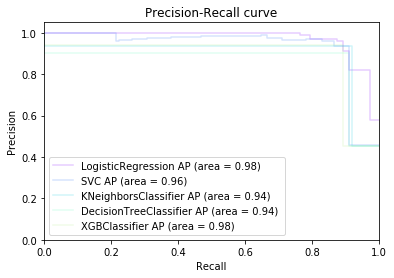

In [27]:
# Plot Precision-Recall curves
prec_recall_curves(classifiers, best_estimators, X_test_us, y_test_us)

However, for us both precision and recall is important. On that front, as we compare Precision Vs Recall, again Logistic Regression and XGBoost Classifier has the highest Area under Curve (AUC) for Precision Recall, closely followed by Support Vector Classifier.

#### Receiver Operating Characteristic Curve

In [28]:
def roc_curves(classifiers, best_estimators, X_test, y_test):
    """
    Helper function to plot the ROC Curve
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
    """
    
    color=iter(cm.rainbow(np.linspace(0,15,100)))
    for key, model in best_estimators.items():
        y_pred = model.predict(X_test) # predict the test data
        # Compute False postive rate, and True positive rate
        if hasattr(model, "decision_function"):
            y_pred = model.decision_function(X_test)
        else:
            y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(y_test,y_pred)
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model.__class__.__name__, auc))
    
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()               

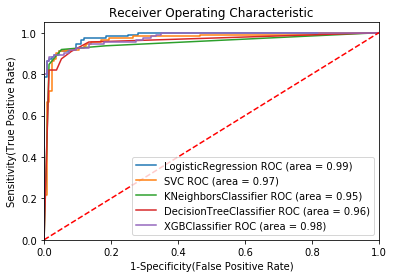

In [29]:
#  Plot ROC curves
roc_curves(classifiers, best_estimators, X_test_us, y_test_us)

##### Receiver Operating Characteristic (ROC Curve) helps understand how well a model can separate two classes. 

It is plotted with True Positive Rate on y-axis Vs False Positive Rate on X-axisThe Area under Curve is a measure of separability. Higher the area, better the ROC. 

As per the results, again Logistic Regression has the best AUC ROC score of 99%, followed by XGBoost Classifier and SVC.

### Analysis of Results on the Undersampled Data

Comparing the final scores, XGBClassifier and Logistic Clasifier were the best two out of the rest. But the main point to note is that the results have greatly improved from original dataset and there is no more overfitting because of imbalanced data. 

## SMOTE - Oversampling Technique

In [32]:
# Scripts for installing imblearn
# !python -m pip install -U imbalanced-learn
# !conda install -c glemaitre imbalanced-learn

In [33]:
# Importing required library for oversampling
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [34]:
# Creating X and y values using SMOTE Oversampling technique
X_os, y_os = SMOTE().fit_sample(X_org,y_org.values.ravel())

In [35]:
# Converting into dataframe
X_os = pd.DataFrame(X_os)
y_os = pd.DataFrame(y_os)

#### Data-preprocessing on the oversampled data

In [36]:
# Splitting into training and test set
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.25, random_state = 123)

#### Fitting & Predicting the Model on train and test set

In [37]:
# Fit & Predict
predictions = simple_fit_predict(classifiers, X_train_os, X_test_os, y_train_os, y_test_os)

Validation Scores:

Logistic Regression Classifier scores


Precision:
Training score:  91.63 % 	 Testing score:  91.53 %
Recall:
Training score:  97.37 % 	 Testing score:  97.34 %
F1 Score:
Training score:  94.41 % 	 Testing score:  94.34 %
Accuracy:
Training score:  94.58 % 	 Testing score:  94.5 %


Support Vector Classifier scores


Precision:
Training score:  99.93 % 	 Testing score:  99.93 %
Recall:
Training score:  99.78 % 	 Testing score:  99.74 %
F1 Score:
Training score:  99.85 % 	 Testing score:  99.84 %
Accuracy:
Training score:  99.85 % 	 Testing score:  99.84 %


K-Nearest Neighbor scores


Precision:
Training score:  100.0 % 	 Testing score:  100.0 %
Recall:
Training score:  99.86 % 	 Testing score:  99.81 %
F1 Score:
Training score:  99.93 % 	 Testing score:  99.9 %
Accuracy:
Training score:  99.93 % 	 Testing score:  99.9 %


Decision Tree Classifier scores


Precision:
Training score:  100.0 % 	 Testing score:  99.87 %
Recall:
Training score:  100.0 % 	 Testing score:

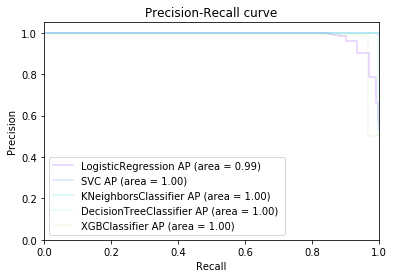

In [38]:
# Plotting Precision-Recall curves
prec_recall_curves(classifiers, predictions, X_test_os, y_test_os)

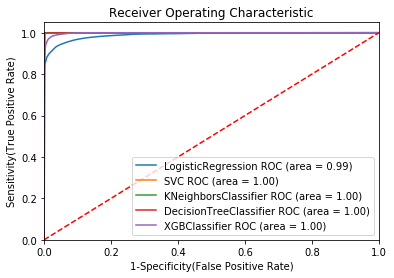

In [39]:
# Plotting ROC curves
roc_curves(classifiers, predictions, X_test_os, y_test_os)

#### Reporting

In [30]:
def report(best_estimators, X_test, y_test):
    """Helper function to print Classification Report
    
    Arguments:
    
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
    """
    for key, model in best_estimators.items():
        y_pred = model.predict(X_test) # predict the test data
        print(model.__class__.__name__)
        print('------------------------------------')
        print(classification_report(y_test,y_pred, digits = 4))
        print('====================================')
        print('\n')

In [40]:
# Classification report
report(predictions, X_test_os, y_test_os)

LogisticRegression
------------------------------------
              precision    recall  f1-score   support

           0     0.9198    0.9749    0.9465     70962
           1     0.9734    0.9153    0.9434     71196

    accuracy                         0.9450    142158
   macro avg     0.9466    0.9451    0.9450    142158
weighted avg     0.9466    0.9450    0.9450    142158



SVC
------------------------------------
              precision    recall  f1-score   support

           0     0.9993    0.9974    0.9984     70962
           1     0.9974    0.9993    0.9984     71196

    accuracy                         0.9984    142158
   macro avg     0.9984    0.9984    0.9984    142158
weighted avg     0.9984    0.9984    0.9984    142158



KNeighborsClassifier
------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9980    0.9990     70962
           1     0.9981    1.0000    0.9990     71196

    accuracy           

### Analysis of Results on the OverSampled Data

As you can see from the results, the oversampled data gave enough training to the machine that almost all the classifiers were able to predict excellently well, some close to 99.99%. And clearly there were no overfitting as there is not much difference between training and testing accuracy. 

## Deep Learning - Artificial Neural Network

In [41]:
# Importing libraries for Deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger


In [42]:
# Building the ANN model
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
def ann(model, X_train, X_test, y_train, y_test, data):
    """ Function to fit, predict and evaluate the results
    
    Args:
    
    model: object of ANN model created
    X_train: X values of train set
    X_test: X values of test set
    y_train: y values of train set
    y_test: y values of test set
    data: String to denote if its original/undersampled/oversampled
      
    """
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size=15,epochs=5)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    y_test = pd.DataFrame(y_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print("\n\nConfusion Matrix\n", cm)
    print("\n\n")
    
 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred.round())
    average_precision = round(average_precision_score(y_test, y_pred),2)
    step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
    #c=next(color)
    plt.step(recall, precision, color='b', alpha=0.2,
                 where='post', label='%s AP (area = %0.2f) ' % ('ANN '+data, average_precision))
        
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)   

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc = 'best')
    plt.title('Precision-Recall curve')
    print('Artificial Neural Network', data)
    print('------------------------------------')
    print(classification_report(y_test,y_pred, digits = 4))
    print('====================================')
    print('\n')

In [61]:
def classification_report_ann(y_pred, y_test,data):
    print('Artificial Neural Network', data)
    print('------------------------------------')
    print(classification_report(y_test,y_pred, digits = 4))
    print('====================================')
    print('\n')

Epoch 1/5
213605/213605 [==============================] - 26s 120us/step - loss: 0.0023 - acc: 0.9995
Epoch 2/5
213605/213605 [==============================] - 25s 116us/step - loss: 0.0025 - acc: 0.9995
Epoch 3/5
213605/213605 [==============================] - 25s 118us/step - loss: 0.0022 - acc: 0.9995
Epoch 4/5
213605/213605 [==============================] - 25s 117us/step - loss: 0.0023 - acc: 0.9995
Epoch 5/5
213605/213605 [==============================] - 25s 118us/step - loss: 0.0020 - acc: 0.9995


Confusion Matrix
 [[71069    10]
 [   42    81]]



Artificial Neural Network Original Data
------------------------------------
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996     71079
           1     0.8901    0.6585    0.7570       123

    accuracy                         0.9993     71202
   macro avg     0.9448    0.8292    0.8783     71202
weighted avg     0.9992    0.9993    0.9992     71202





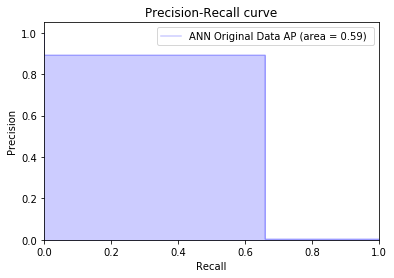

In [62]:
# Artificial Neural Network on Original Data
ann(model, X_train_org, X_test_org, y_train_org, y_test_org, 'Original Data' )

#### Analysis of Results on the Original data

ANN gives an ideal accuracy while training, but fails miserably on the test data, as shown by the precision-recall curve with an area of only 59%. This shows clear overfitting of the train data and it arised because of the imbalanced dataset.

### ANN on the Under-Sampled Data

Epoch 1/5
738/738 [==============================] - 1s 2ms/step - loss: 0.6154 - acc: 0.9038
Epoch 2/5
738/738 [==============================] - 0s 147us/step - loss: 0.3801 - acc: 0.9336
Epoch 3/5
738/738 [==============================] - 0s 131us/step - loss: 0.1997 - acc: 0.9350
Epoch 4/5
738/738 [==============================] - 0s 124us/step - loss: 0.1790 - acc: 0.9444
Epoch 5/5
738/738 [==============================] - 0s 111us/step - loss: 0.1625 - acc: 0.9444


Confusion Matrix
 [[135   0]
 [ 14  97]]



Artificial Neural Network Under-Sampled Data
------------------------------------
              precision    recall  f1-score   support

           0     0.9060    1.0000    0.9507       135
           1     1.0000    0.8739    0.9327       111

    accuracy                         0.9431       246
   macro avg     0.9530    0.9369    0.9417       246
weighted avg     0.9484    0.9431    0.9426       246





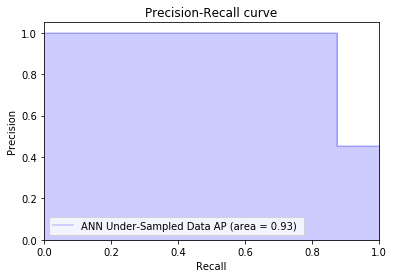

In [63]:
# Artificial Neural Network on Under-sampled Data
ann(model, X_train_us, X_test_us, y_train_us, y_test_us, 'Under-Sampled Data')

#### Analysis of Results on Undersampled Data

The training performance looks much more realistic in this scenario and the precision-recall curve have much better AUC of 93% compared to 59% on the original data. This could still be improved if we had a larger training set, which we are going to see in the next section.

### ANN on the Over-Sampled Data

Epoch 1/5
426472/426472 [==============================] - 50s 118us/step - loss: 0.0211 - acc: 0.9935
Epoch 2/5
426472/426472 [==============================] - 50s 118us/step - loss: 0.0088 - acc: 0.9981
Epoch 3/5
426472/426472 [==============================] - 51s 119us/step - loss: 0.0085 - acc: 0.9983
Epoch 4/5
426472/426472 [==============================] - 52s 121us/step - loss: 0.0074 - acc: 0.9985
Epoch 5/5
426472/426472 [==============================] - 50s 116us/step - loss: 0.0075 - acc: 0.9986


Confusion Matrix
 [[70734   228]
 [    5 71191]]



Artificial Neural Network Over-Sampled Data
------------------------------------
              precision    recall  f1-score   support

           0     0.9999    0.9968    0.9984     70962
           1     0.9968    0.9999    0.9984     71196

    accuracy                         0.9984    142158
   macro avg     0.9984    0.9984    0.9984    142158
weighted avg     0.9984    0.9984    0.9984    142158





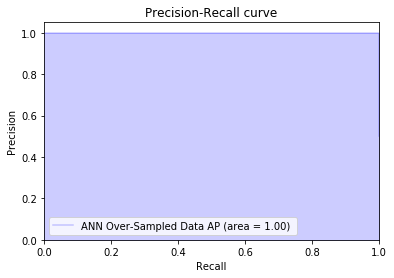

In [64]:
# Artificial Neural Network on Over-sampled Data
ann(model, X_train_os, X_test_os, y_train_os, y_test_os, 'Over-Sampled Data' )

#### Analysis of Results on the Oversampled Data

With a large training set, the training as well as test performance has reached the best possible which is close to 100%.

## Overall Summary

With an imbalanced dataset, there is a higher chance of overfitting. Hence performance of validation as well as test dataset has to be analyzed before concluding the performance of model. 

We can see that by using undersampling technique, the overfitting has greatly reduced and the performance has considerably improved.

With oversampling, some of the studied models were able to achieve close to 100% accuracy and precision which has been highly reassuring that the sampling techniques has achieved its purpose. 

###### End of program